# Explore here

In [77]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


databse = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

#visualize dataframe
databse.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [78]:
#dimensions
databse.shape


(48895, 16)

In [79]:
#obtener info de tipos de datos
databse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [80]:
# verificar duplicate
# databse.drop("id", axis = 1).duplicated().sum()
print(f"Número de ids duplicados {databse['id'].duplicated().sum()}")
print(f"Número de nombres duplicados {databse['name'].duplicated().sum()}")
print(f"Número de host ids duplicados {databse['host_id'].duplicated().sum()}")

# si tengo que eliminar duplicados, usaría lo siguiente
#databse.drop_duplicates("id", axis = 1)

Número de ids duplicados 0
Número de nombres duplicados 989
Número de host ids duplicados 11438


In [81]:
data_limpia = databse.drop([ "id" ,"name" , "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count",], axis=1, inplace=False)
data_limpia.head()
#data_limpia.shape
# id, host name, umber reviews, last review, reviews per month, calculated host listing count

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


/tmp/ipykernel_12446/3374445737.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)


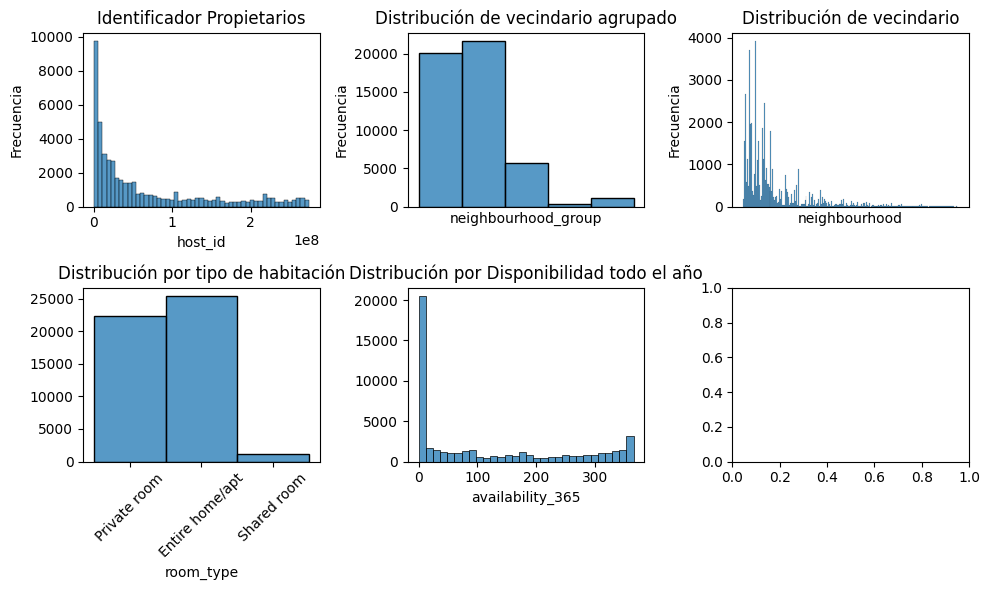

In [82]:
#Graficación variables categóricos
#host_id , neighbourhood_group , neighbourhood , room_type , availability_365

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 6))


# Create a multiple histogram
sns.histplot(ax = axis[0,0], data = data_limpia, x = "host_id")
axis[0,0].set_title("Identificador Propietarios") #Titulo grafico izq
axis[0,0].set_ylabel("Frecuencia") # label de y
#axis[0,0].grid(True) # cuadricula activada
#axis[0,0].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[0,1], data = data_limpia, x = "neighbourhood_group").set_xticks([])
axis[0,1].set_title("Distribución de vecindario agrupado") #Titulo grafico izq
axis[0,1].set_ylabel("Frecuencia") # label de y
#axis[0,1].grid(True) # cuadricula activada
#axis[0,1].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[0,2], data = data_limpia, x = "neighbourhood").set_xticks([])
axis[0,2].set_title("Distribución de vecindario") #Titulo grafico izq
axis[0,2].set_ylabel("Frecuencia") # label de y
#axis[0,2].grid(True) # cuadricula activada
#axis[0,2].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[1,0], data = data_limpia, x = "room_type")
axis[1,0].set_title("Distribución por tipo de habitación")  # Título del segundo subplot
axis[1,0].set_ylabel(None)
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)
#axis[1,0].grid(True)
#axis[1,0].grid(True, linestyle="--", linewidth=0.5, color="red")

sns.histplot(ax = axis[1,1], data = data_limpia, x = "availability_365")
axis[1,1].set_title("Distribución por Disponibilidad todo el año")  # Título del segundo subplot
axis[1,1].set_ylabel(None)
#axis[1,2].grid(True)
#axis[1,2].grid(True, linestyle="--", linewidth=0.5, color="red")


plt.tight_layout()
plt.show()



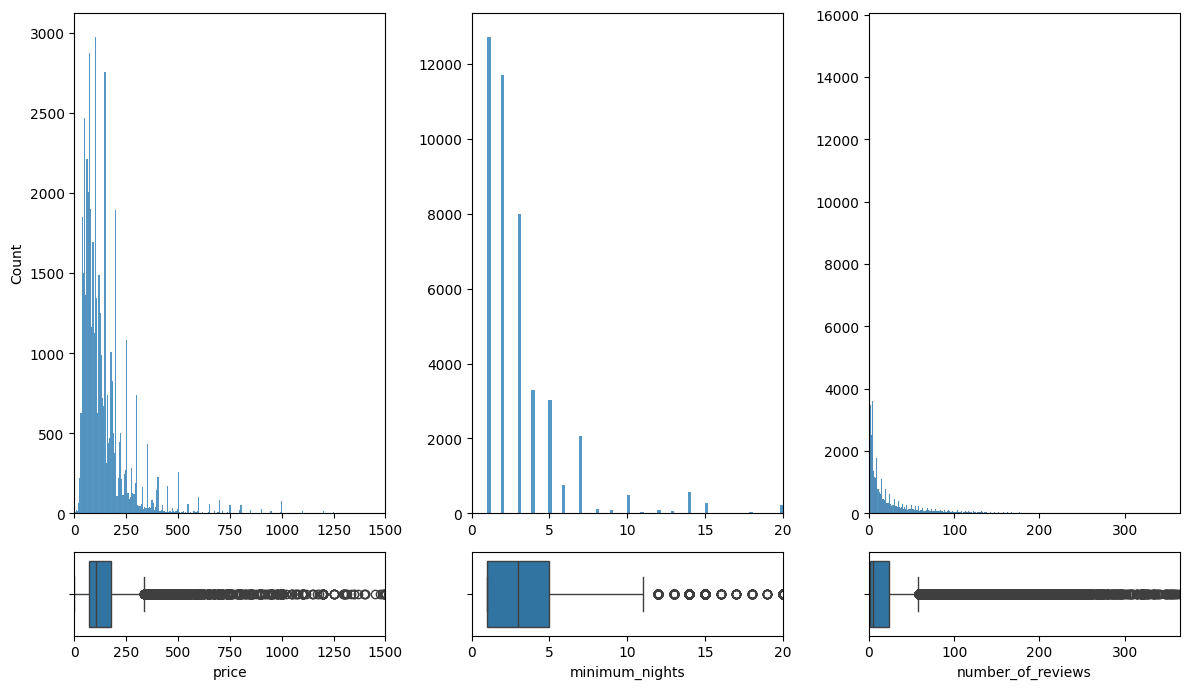

In [83]:
#Graficación variables Numéricos
# price , minimum_nights , number_of_reviews

fig, axis = plt.subplots(2,3 , figsize = (12, 7), gridspec_kw={"height_ratios":[6,1]})


# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_limpia, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpia, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpia, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpia, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpia, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpia, x = "number_of_reviews")
axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[0, 1].set_xlim(0, 20)
axis[1, 1].set_xlim(0, 20)
axis[0, 2].set_xlim(0, 365)
axis[1, 2].set_xlim(0, 365)

# sns.histplot(ax = axis[1,1], data = data_limpia, x = "number_of_reviews")
# axis[1,1].set_title("Distribución por número de reviews")  # Título del segundo subplot
# axis[1,1].set_ylabel(None)
#axis[1,1].grid(True)
#axis[1,1].grid(True, linestyle="--", linewidth=0.5, color="red")

plt. tight_layout()
plt.show()

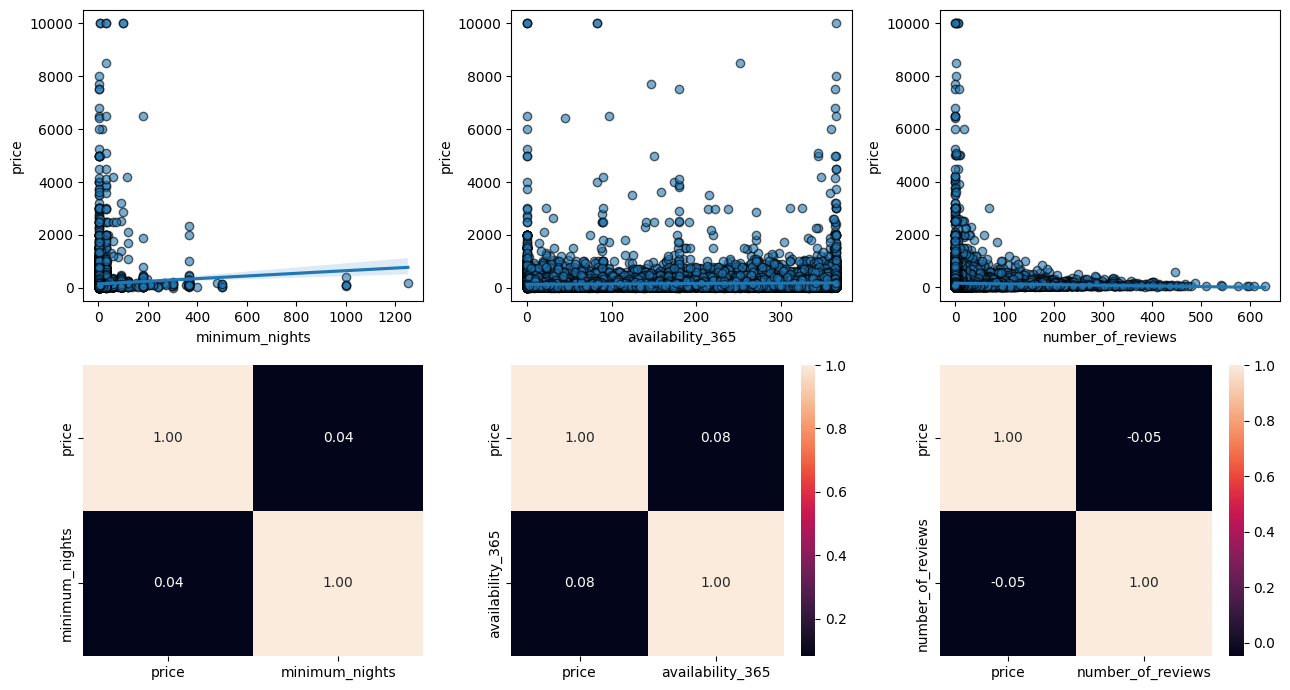

In [84]:
# verificar correlación y afinidad de variables
# numérico a numérico

fig, axis = plt.subplots(2, 3, figsize = (13, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0,0], data = data_limpia, x = "minimum_nights", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data = data_limpia, x = "availability_365", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])

sns.regplot(ax = axis[0,2], data = data_limpia, x = "number_of_reviews", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Combinaciones de variables con varias predictoras



/tmp/ipykernel_12446/612703993.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)


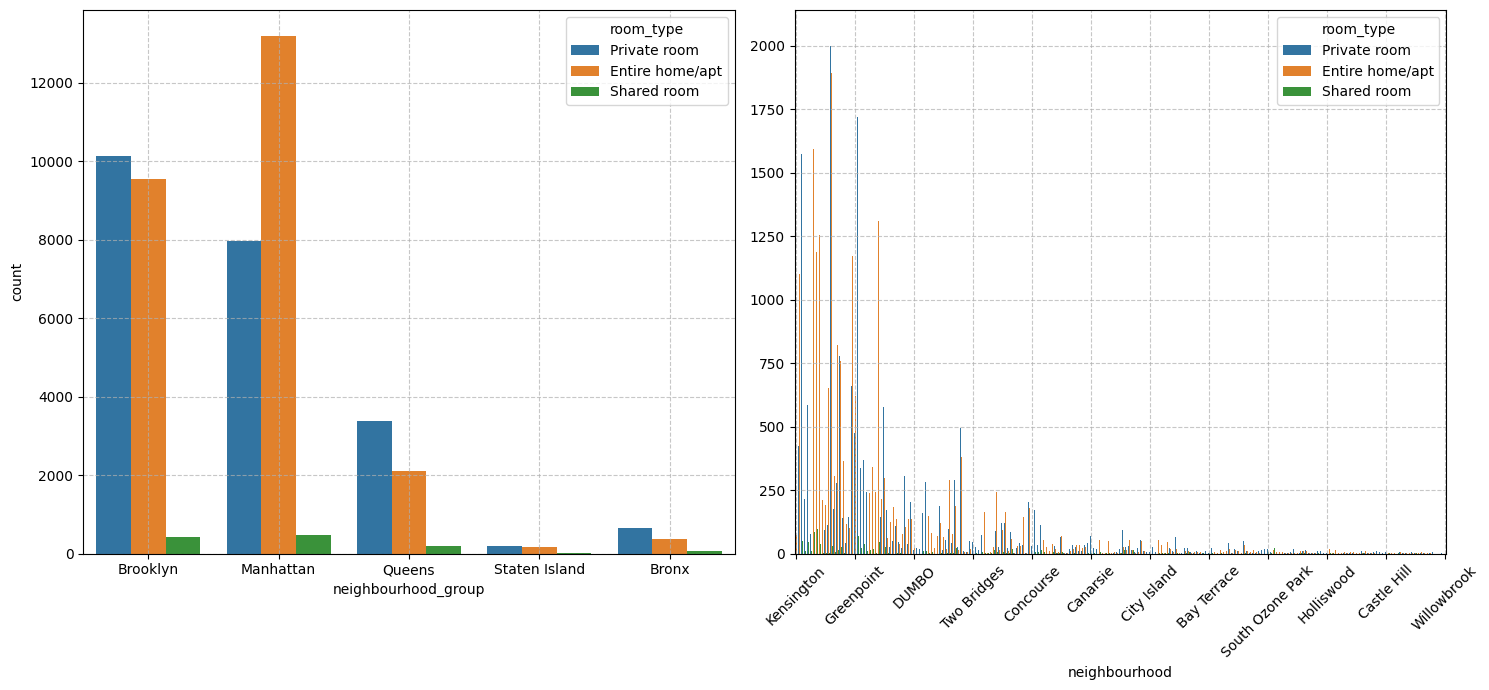

In [85]:
from matplotlib.ticker import MaxNLocator

fig, axis = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = data_limpia, x = "neighbourhood", hue = "room_type").set(ylabel = None)
axis[1].xaxis.set_major_locator(MaxNLocator(nbins=12)) #limitar a 6 etiquetas
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)
axis[0].grid(True, linestyle='--', alpha=0.7)  # Grid en el primer subgráfico
axis[1].grid(True, linestyle='--', alpha=0.7)  # Grid en el segundo subgráfico

plt.tight_layout()
plt.show()

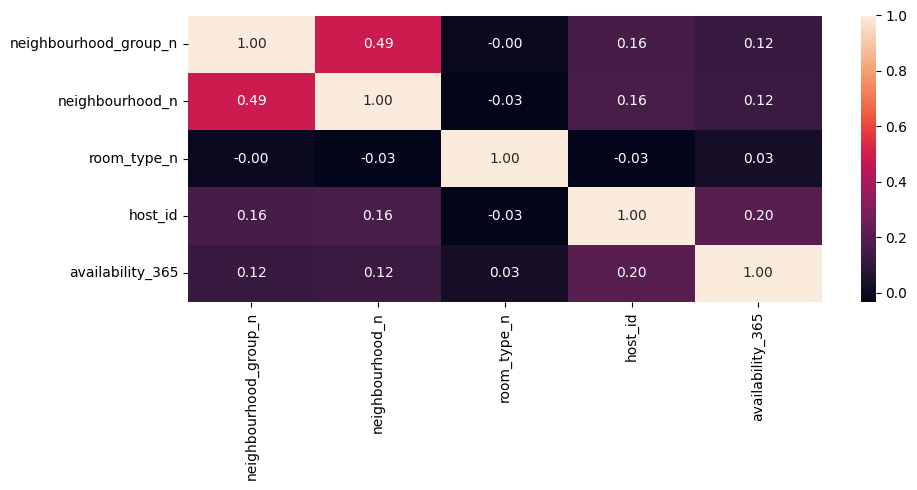

In [86]:
data_limpia["neighbourhood_group_n"] = pd.factorize(data_limpia["neighbourhood_group"])[0]
data_limpia["room_type_n"] = pd.factorize(data_limpia["room_type"])[0]
data_limpia["neighbourhood_n"] = pd.factorize(data_limpia["neighbourhood"])[0]

fig, axis = plt.subplots(figsize=(10, 5))

sns.heatmap(data_limpia[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "host_id", "availability_365"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [87]:
data_limpia

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27,1,1,2
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2,1,2,7


In [88]:
data_limpia["host_id"][1:]

1            2845
2            4632
3            4869
4            7192
5            7322
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48894, dtype: int64

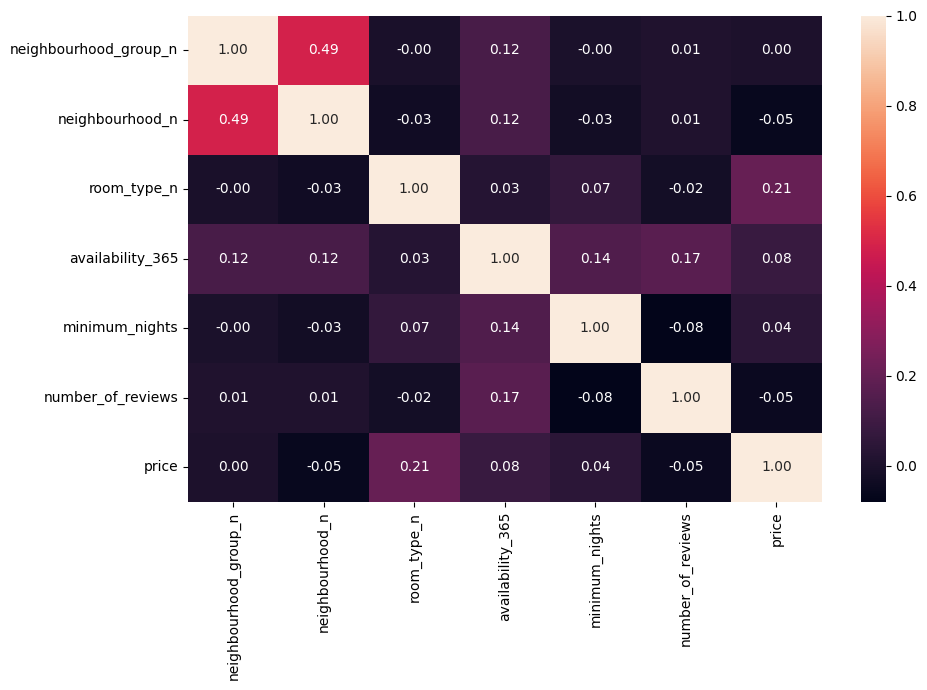

In [89]:
#análisis numérico categórico completo
#host_id , neighbourhood_group , neighbourhood , room_type , availability_365
# price , minimum_nights , number_of_reviews

fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(data_limpia[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "availability_365","minimum_nights","number_of_reviews","price"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [90]:
#NO SE ENCUENTRA DATOS A RELACIONAR
# fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

# sns.regplot(ax = axis[0], data = data_limpia, x = "price", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
# sns.regplot(ax = axis[1], data = data_limpia, x = "price", y = "neighbourhood", scatter_kws={'edgecolor': 'k', 'alpha': 0.6}).set(ylabel = None, ylim = (0.9, 3.1))

# plt.tight_layout()

# plt.show()

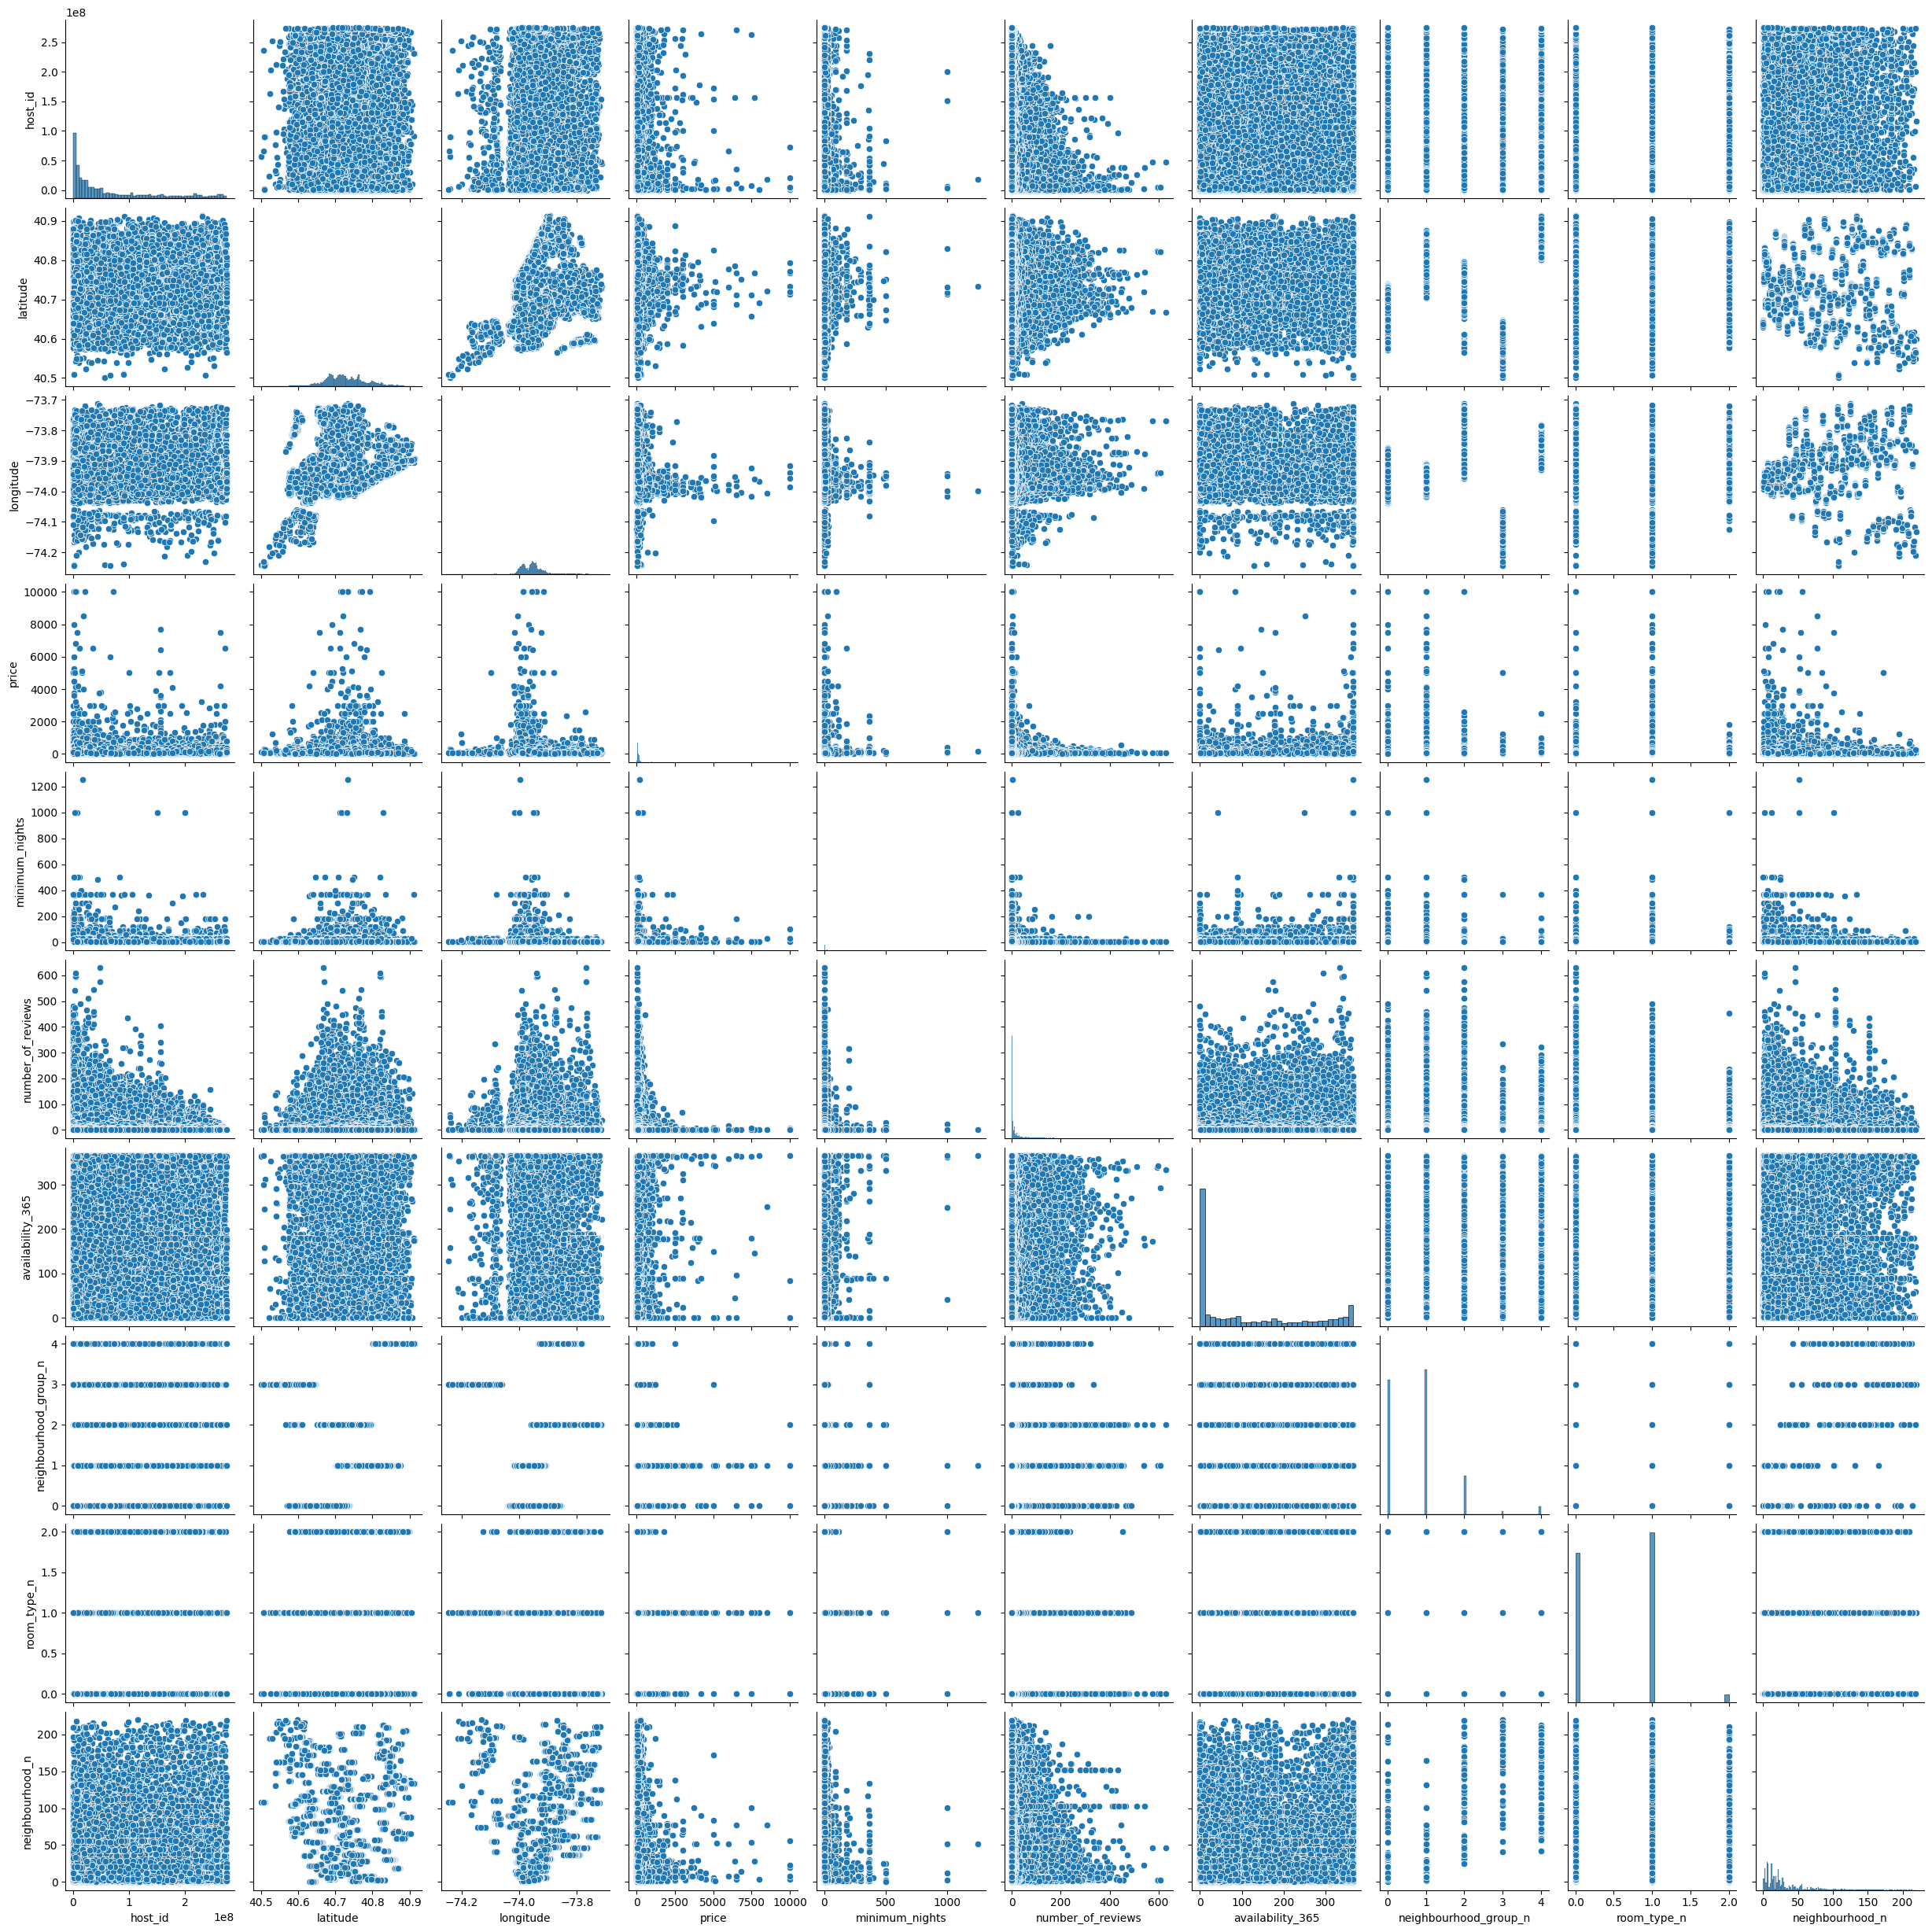

In [91]:
sns.pairplot(data = data_limpia)

In [92]:
data_limpia.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327,0.786911,0.567113,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289,0.844386,0.541249,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000,4.000000,2.000000,220.000000


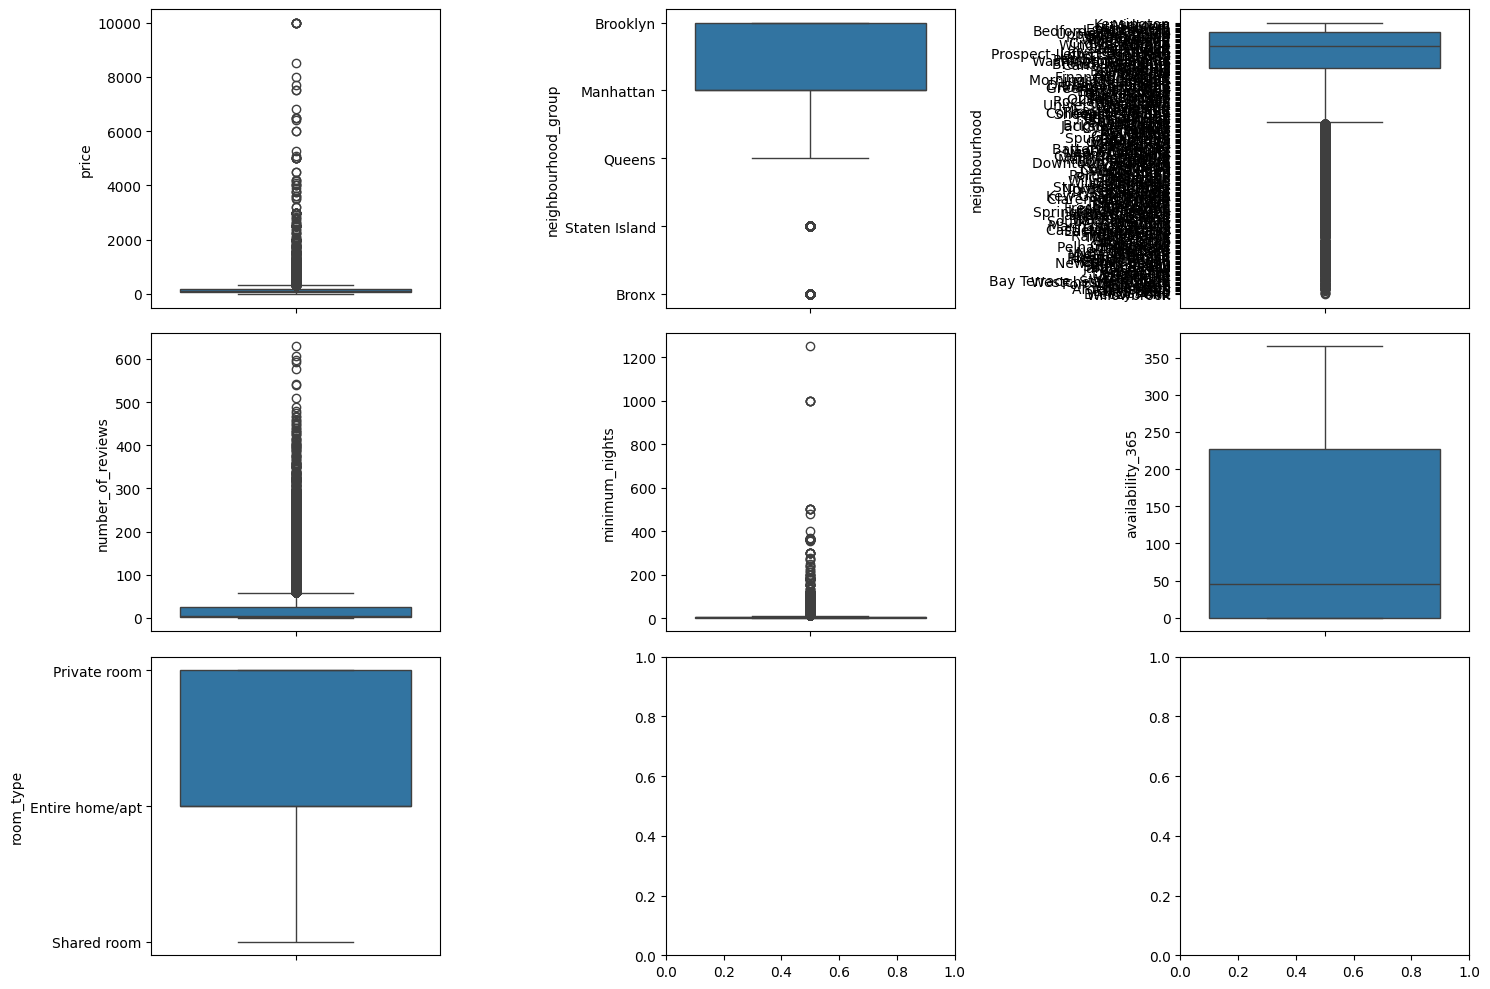

In [93]:
#price , neighbourhood_group , neighbourhood , number_of_reviews , minimum_nights , availability_365 , room_type
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_limpia, y = "price")
sns.boxplot(ax = axis[0, 1], data = data_limpia, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 2], data = data_limpia, y = "neighbourhood")
sns.boxplot(ax = axis[1, 0], data = data_limpia, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = data_limpia, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = data_limpia, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = data_limpia, y = "room_type")

plt.tight_layout()

plt.show()

In [94]:
price_stats = data_limpia["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [95]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [96]:
data_limpia[data_limpia["price"] > 0]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27,1,1,2
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2,1,2,7


In [97]:
#Automatiazación para encontrar outliers
columns_with_outliers = []
# Iterar sobre las columnas numéricas del DataFrame
for column in data_limpia.select_dtypes(include=['float64', 'int64']).columns:
    # Calcular los cuartiles y el IQR para cada columna
    Q1 = data_limpia[column].quantile(0.25)
    Q3 = data_limpia[column].quantile(0.75)
    IQR = Q3 - Q1
    # Calcular los límites inferiores y superiores para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Detectar los outliers (valores fuera de los límites)
    outliers = data_limpia[(data_limpia[column] < lower_limit) | (data_limpia[column] > upper_limit)]
    # Si hay outliers, agregar el nombre de la columna a la lista
    if not outliers.empty:
        columns_with_outliers.append(column)
# Mostrar las columnas que contienen outliers
print("Columnas con outliers:", columns_with_outliers)

Columnas con outliers: ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group_n', 'neighbourhood_n']


In [98]:
import json

total_data_con_outliers = data_limpia.copy()
total_data_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in columns_with_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/dict_with_outliers.json", "w") as f:
  json.dump(outliers_dict, f)
outliers_dict

{'host_id': [np.float64(-141596552.0), np.float64(256853008.0)],
 'latitude': [np.float64(40.580577500000004), np.float64(40.872637499999996)],
 'longitude': [np.float64(-74.0532625), np.float64(-73.86608249999999)],
 'price': [np.float64(-90.0), np.float64(334.0)],
 'minimum_nights': [np.float64(-5.0), np.float64(11.0)],
 'number_of_reviews': [np.float64(-33.5), np.float64(58.5)],
 'neighbourhood_group_n': [np.float64(-1.5), np.float64(2.5)],
 'neighbourhood_n': [np.float64(-36.75), np.float64(81.25)]}

In [99]:
total_data_con_outliers

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27,1,1,2
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2,1,2,7


In [100]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

host_id                  0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
availability_365         0
neighbourhood_group_n    0
room_type_n              0
neighbourhood_n          0
dtype: int64

In [101]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False) / len(total_data_con_outliers)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False) / len(total_data_sin_outliers)

host_id                  0.0
neighbourhood_group      0.0
neighbourhood            0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
number_of_reviews        0.0
availability_365         0.0
neighbourhood_group_n    0.0
room_type_n              0.0
neighbourhood_n          0.0
dtype: float64

In [102]:
nights_stats = data_limpia["minimum_nights"].describe()
nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [103]:
# Rango IQ for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango interquartil de {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango interquartil de 4.0


In [104]:
data_limpia = data_limpia[data_limpia["minimum_nights"] <= 15]

In [105]:
review_stats = data_limpia["number_of_reviews"].describe()
review_stats

count    43274.000000
mean        25.215256
std         46.291490
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [106]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango interquartil de {round(review_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.0 y -38.0, con un rango interquartil de 26.0


In [107]:
# Count NaN
data_limpia.isnull().sum().sort_values(ascending = False)

host_id                  0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
availability_365         0
neighbourhood_group_n    0
room_type_n              0
neighbourhood_n          0
dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group_n", "neighbourhood_n", "number_of_reviews", "minimum_nights",
                  "availability_365", "room_type_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y = total_data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,neighbourhood_group_n,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
32645,0,12,11,3,1,1
23615,1,30,2,2,0,0
31183,0,6,0,2,0,0
29260,0,6,87,3,267,1
7275,2,31,13,5,0,0


In [109]:
from sklearn.preprocessing import StandardScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,neighbourhood_group_n,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
32645,-0.931915,-0.514100,-0.277198,-0.193025,-0.852862,0.798949
23615,0.256169,0.005517,-0.479451,-0.239596,-0.860447,-1.050482
31183,-0.931915,-0.687306,-0.524396,-0.239596,-0.860447,-1.050482
29260,-0.931915,-0.687306,1.430714,-0.193025,1.164663,0.798949
7275,1.444253,0.034385,-0.232253,-0.099884,-0.860447,-1.050482


In [110]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,neighbourhood_group_n,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
32645,0.00,0.054545,0.017488,0.001601,0.002740,0.5
23615,0.25,0.136364,0.003180,0.000801,0.000000,0.0
31183,0.00,0.027273,0.000000,0.000801,0.000000,0.0
29260,0.00,0.027273,0.138315,0.001601,0.731507,0.5
7275,0.50,0.140909,0.020668,0.003203,0.000000,0.0


DIA 3

In [111]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

X_train_sel.head()

import json

with open("../models/feature_selection_k_5.json", "w") as f:
  json.dump(X_train_sel.columns.tolist(), f)


X_train_sel.head()

,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
0,0.054545,0.017488,0.001601,0.002740,0.5
1,0.136364,0.003180,0.000801,0.000000,0.0
2,0.027273,0.000000,0.000801,0.000000,0.0
3,0.027273,0.138315,0.001601,0.731507,0.5
4,0.140909,0.020668,0.003203,0.000000,0.0


In [112]:
X_test_sel

,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
0,0.000000,0.098569,0.001601,0.517808,0.5
1,0.200000,0.000000,0.016013,0.200000,0.0
2,0.031818,0.027027,0.000801,0.000000,0.0
3,0.195455,0.007949,0.000801,0.745205,0.5
4,0.018182,0.047695,0.000801,0.082192,0.5
...,...,...,...,...,...
9774,0.086364,0.028617,0.000801,0.186301,0.5
9775,0.004545,0.000000,0.000000,0.805479,0.0
9776,0.168182,0.007949,0.000000,0.013699,0.0
9777,0.086364,0.000000,0.000801,0.000000,0.5


In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)
